# Sobre
Este notepad serve para inserir as avaliações colocadas em planilha dentro do banco de dados.

## Carregamento da Avaliação

In [1]:
import pandas as pd
import sqlite3

In [50]:
df = pd.read_excel(r'Scraping\Rotulagem de Dados Extraídos.xlsx', 'Avaliação')

In [51]:
df.head()

,ibge,procurement_id,Fonte,Produto/Serviço Extraído,Secretaria Extraída,Avaliação Prod/Serv,Avaliação Secretaria,Observação do Avaliador
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Serviços de Internet com link dedicado,Câmara Municipal de Ponta Grossa,Extração Correta,Inferência incorreta,NaN
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Puxadores para janelas tipo “Maxim Ar”,Não informado,Extração Correta,"Correto, sem dados",NaN
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Relógio protocolador eletrônico,Não informado,Extração Correta,"Correto, sem dados",NaN
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Serviços de Saúde e Segurança do Trabalho,Não informado,Extração Correta,"Correto, sem dados",NaN
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Aquisição de 08 refrigeradores tipo frigobar,Não informado,Extração Correta,"Correto, sem dados",NaN


In [52]:
list_id_ibge = list(df['ibge'])
list_id = list(df['procurement_id'])
list_new_value5 = list(df['Avaliação Prod/Serv'])
list_new_value6 = list(df['Avaliação Secretaria'])

In [53]:
def update_procurements_filed(list_id_ibge, list_id, list_new_value, field):

    update = f"UPDATE PROCUREMENTS set {field} = ? where ibge = ? and procurement_id = ?"
    con = sqlite3.connect("scraped.db")
    cursor = con.cursor()
    to_update = []
    for id_ibge, id, new_value in zip(list_id_ibge, list_id, list_new_value):
        to_update.append((new_value, id_ibge, id))
    cursor.executemany(update, to_update)
    con.commit()
    con.close()
    pass

update_procurements_filed(list_id_ibge, list_id, list_new_value5, 'extra5')
update_procurements_filed(list_id_ibge, list_id, list_new_value6, 'extra6')

## Data Analysis

### Correlation Test

In [10]:
import pandas as pd
import sqlite3
import seaborn as sns
%matplotlib inline

In [6]:
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra3, extra5, extra4, extra6 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra3": "Gemini_ProdServ", "extra5": "Eval_ProdServ", "extra4": "Gemini_Camara", "extra6": "Eval_Camara"})
df.head()

,ibge,procurement_id,Objeto,Gemini_ProdServ,Eval_ProdServ,Gemini_Camara,Eval_Camara
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Serviços de Internet com link dedicado,Extração Correta,Câmara Municipal de Ponta Grossa,Inferência incorreta
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Puxadores para janelas tipo “Maxim Ar”,Extração Correta,Não informado,"Correto, sem dados"
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Relógio protocolador eletrônico,Extração Correta,Não informado,"Correto, sem dados"
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Serviços de Saúde e Segurança do Trabalho,Extração Correta,Não informado,"Correto, sem dados"
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Aquisição de 08 refrigeradores tipo frigobar,Extração Correta,Não informado,"Correto, sem dados"


In [7]:
df_dummy_camara = pd.get_dummies(df[['Gemini_Camara', 'Eval_Camara']], prefix=['Gemini', 'Eval'], dtype=float)
df_dummy_camara.head()

,Gemini_ABEHD,Gemini_APAE,Gemini_Assistência Social,Gemini_Associação Beneficente Doutor Hugo Dehe,Gemini_Associação de Pais Amigos dos Excepcionais,Gemini_Associação dos acadêmicos de Engenheiro Beltrão/PR,Gemini_Centro de Formação Agrícola Marlene Pereira,Gemini_Centros de Educação Infantil,Gemini_Conselho Tutelar,Gemini_Creche Ana Zenir Salamoni Cury,...,Gemini_Unidades básicas de saúde,Eval_Alucinação,Eval_Ausência de inferência,"Eval_Correto, mas incompleto","Eval_Correto, sem dados",Eval_Dados não informados,Eval_Extração correta,Eval_Inferência Incorreta,Eval_Inferência correta,Eval_Inferência incorreta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

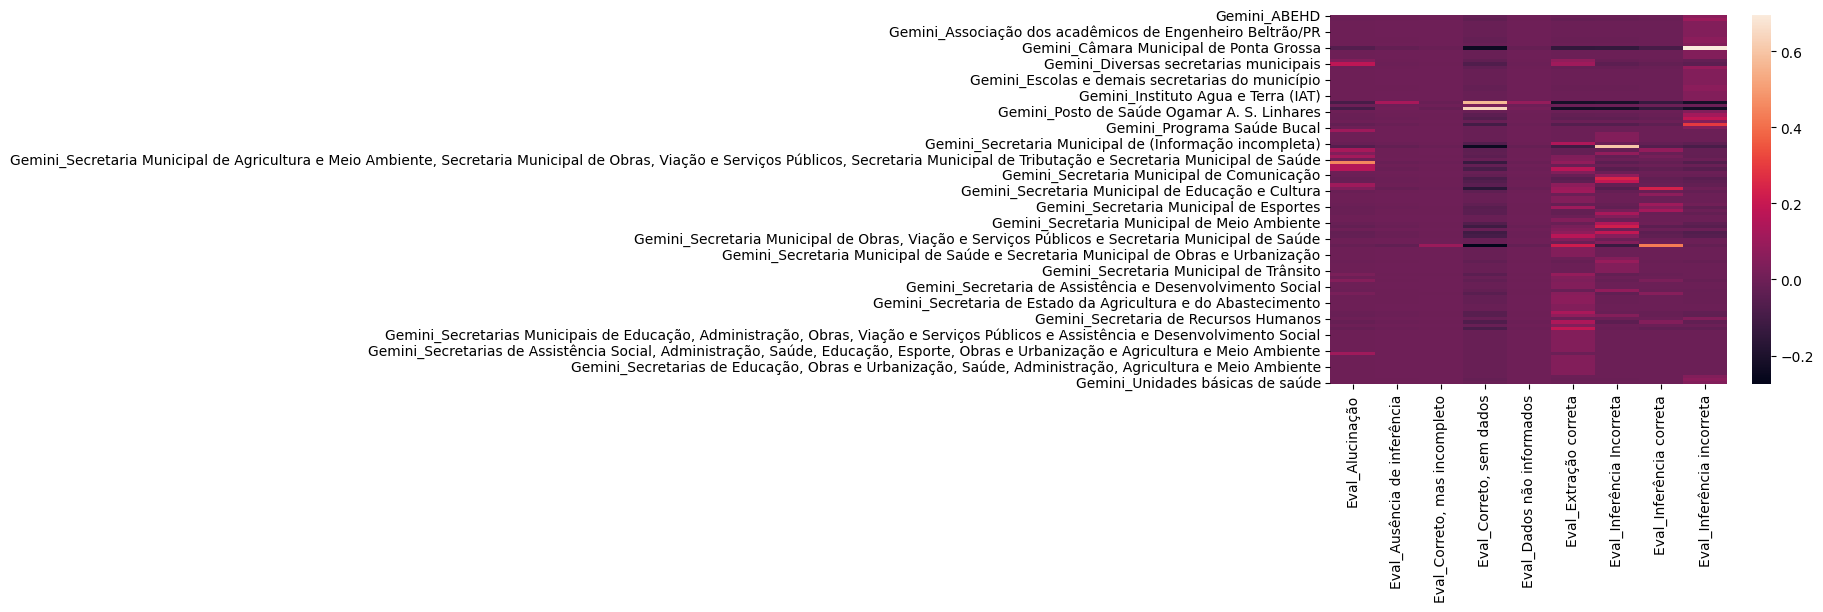

In [9]:
import seaborn as sns
Gemini_Camara_columns = df_dummy_camara.columns.values
Gemini_Camara_columns = list(filter(lambda x: x.startswith('Gemini'), Gemini_Camara_columns))
Eval_Camara_columns = df_dummy_camara.columns.values
Eval_Camara_columns = list(filter(lambda x: x.startswith('Eval'), Eval_Camara_columns))

df_camara_corr = df_dummy_camara.corr()
df_camara_corr = df_camara_corr[Eval_Camara_columns].loc[Gemini_Camara_columns]
sns.heatmap(df_camara_corr)

Claramente os dados precisam ser higienizados antes da análise, visto que existem muitos rótulos aplicados pelo Gemini e vários podem ser agregados, da seguinte forma:
* Objetos com mais de uma camara podem ser reclassificados em uma cartegoria geral "mais de uma secretaria";
* Algumas secretarias tem grafias diferentes como "Secretaria Municipal de Saúde", "Secretária Municipal de Saúde" e "Secretaria de Saúde" e podem ser agregadas, serão classificadas como "Diversas";
* Por fim, orgãos que não são secretarias, podem ser agrupados também, exemplo "Câmara Municipal de Ponta Grossa", "APAE" e "ABEHD", serão classificadas como "orgão que não é Secretaria";
* Gemini não completou a sentença informando qual secretaria se trata serão classificadas como "Informação incompleta", embora possam ser muito similares ao "Não informado".

Infelizmente devido ao volume a natureza dos dados de produto e serviço, os dados não podem ser agrupados em grupos claros, desta forma, não serão analisados.


### Higienização

Foi criada uma planilha para higienizar os dados fazendo um agrupamento simples. Esta planilha será carregada no banco de dados na coluna ```extra7``` da tabela ```PROCUREMENTS```.

In [100]:
import csv
import sqlite3

def update_procurements_extra7(list_aggregate, list_gemini_class):

    update = f"UPDATE PROCUREMENTS set extra7 = ? where UPPER(extra4) = UPPER(?)"
    con = sqlite3.connect("scraped.db")
    cursor = con.cursor()
    to_update = []
    for agregate, gemini_class in zip(list_aggregate, list_gemini_class):
        to_update.append((agregate, gemini_class))
    cursor.executemany(update, to_update)
    con.commit()
    con.close()
    pass


list_aggregate = []
list_gemini_class = []
with open("Scraping\DePara Higienização.csv", 'r', encoding='latin-1') as file:
    csvreader = csv.reader(file, delimiter=';', quotechar='"')
    header = next(csvreader)
    for row in csvreader:
        list_gemini_class.append(row[0])
        list_aggregate.append(row[1])

update_procurements_extra7(list_aggregate, list_gemini_class)


In [54]:
#Check
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra4, extra6, extra7 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra4": "Gemini_Camara", "extra6": "Eval_Camara", "extra7": "Aggregate_Camara"})
df.head()

,ibge,procurement_id,Objeto,Gemini_Camara,Eval_Camara,Aggregate_Camara
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Inferência incorreta,orgão que não é Secretaria
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,"Correto, sem dados",Não informado
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,"Correto, sem dados",Não informado
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,"Correto, sem dados",Não informado
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,"Correto, sem dados",Não informado


Após a higienização vamos tentar novamente avaliar a matrix de correlação

### Correlation Matrix

In [11]:
import pandas as pd
import sqlite3
import seaborn as sns
%matplotlib inline

In [41]:
sns.color_palette("viridis", 10)

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

In [71]:
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra7, extra6 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df.set_index(['ibge', 'procurement_id'])
df = df.rename(columns={"goal":"Objeto", "extra7": "Gemini_Agregated", "extra6": "Manual_Evaluation"})
df.head()

,ibge,procurement_id,Objeto,Gemini_Agregated,Manual_Evaluation
0,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,orgão que não é Secretaria,Inferência incorreta
1,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,"Correto, sem dados"
2,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,"Correto, sem dados"
3,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,"Correto, sem dados"
4,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,"Correto, sem dados"


In [72]:
df_dummy_camara = pd.get_dummies(df[['Gemini_Agregated', 'Manual_Evaluation']], prefix=['Gemini', 'Eval'], dtype=float)
df_dummy_camara.head()

,Gemini_Diversas,Gemini_Informação incompleta,Gemini_Não informado,Gemini_de Administração,Gemini_de Agricultura/Abastecimento,Gemini_de Agricultura/Abastecimento/Meio Ambiente,Gemini_de Assistência/Desenvolvimento Social/Ação Social,Gemini_de Comunicação,Gemini_de Desenvolvimento Econômico,Gemini_de Educação/Cultura,...,Gemini_de Trânsito/Transporte,Gemini_orgão que não é Secretaria,Eval_Alucinação,Eval_Ausência de inferência,"Eval_Correto, mas incompleto","Eval_Correto, sem dados",Eval_Dados não informados,Eval_Extração correta,Eval_Inferência correta,Eval_Inferência incorreta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

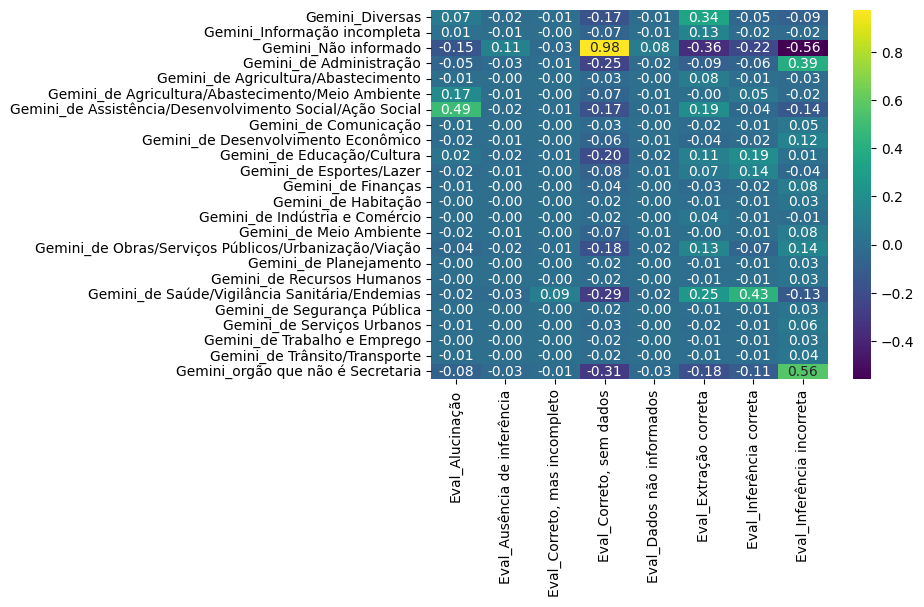

In [73]:
Gemini_Camara_columns = df_dummy_camara.columns.values
Gemini_Camara_columns = list(filter(lambda x: x.startswith('Gemini'), Gemini_Camara_columns))
Eval_Camara_columns = df_dummy_camara.columns.values
Eval_Camara_columns = list(filter(lambda x: x.startswith('Eval'), Eval_Camara_columns))

df_camara_corr = df_dummy_camara.corr()
df_camara_corr = df_camara_corr[Eval_Camara_columns].loc[Gemini_Camara_columns]
sns.heatmap(df_camara_corr, annot=True, fmt=".2f", cmap="viridis")

In [78]:
df_camara_corr

,Eval_Alucinação,Eval_Ausência de inferência,"Eval_Correto, mas incompleto","Eval_Correto, sem dados",Eval_Dados não informados,Eval_Extração correta,Eval_Inferência correta,Eval_Inferência incorreta
Gemini_Diversas,0.065386,-0.018671,-0.007821,-0.169521,-0.014299,0.337667,-0.054397,-0.086575
Gemini_Informação incompleta,0.009737,-0.007336,-0.003073,-0.066606,-0.005618,0.126288,-0.024358,-0.021066
Gemini_Não informado,-0.149459,0.107533,-0.027764,0.976322,0.082353,-0.358809,-0.220088,-0.559506
Gemini_de Administração,-0.053752,-0.027275,-0.011424,-0.247637,-0.020888,-0.091174,-0.063182,0.390096
Gemini_de Agricultura/Abastecimento,-0.006732,-0.002986,-0.001251,-0.027107,-0.002286,0.077379,-0.009913,-0.025201
Gemini_de Agricultura/Abastecimento/Meio Ambiente,0.167403,-0.007336,-0.003073,-0.066606,-0.005618,-0.001403,0.049938,-0.021066
Gemini_de Assistência/Desenvolvimento Social/Ação Social,0.488032,-0.018932,-0.007930,-0.171889,-0.014499,0.186359,-0.040352,-0.135047
Gemini_de Comunicação,-0.006732,-0.002986,-0.001251,-0.027107,-0.002286,-0.016161,-0.009913,0.049623
Gemini_de Desenvolvimento Econômico,-0.016072,-0.007128,-0.002986,-0.064716,-0.005459,-0.038584,-0.023667,0.118472
Gemini_de Educação/Cultura,0.024188,-0.022097,-0.009256,-0.200629,-0.016923,0.105167,0.194743,0.011264


<Axes: xlabel='Manual_Evaluation', ylabel='Gemini_Agregated'>

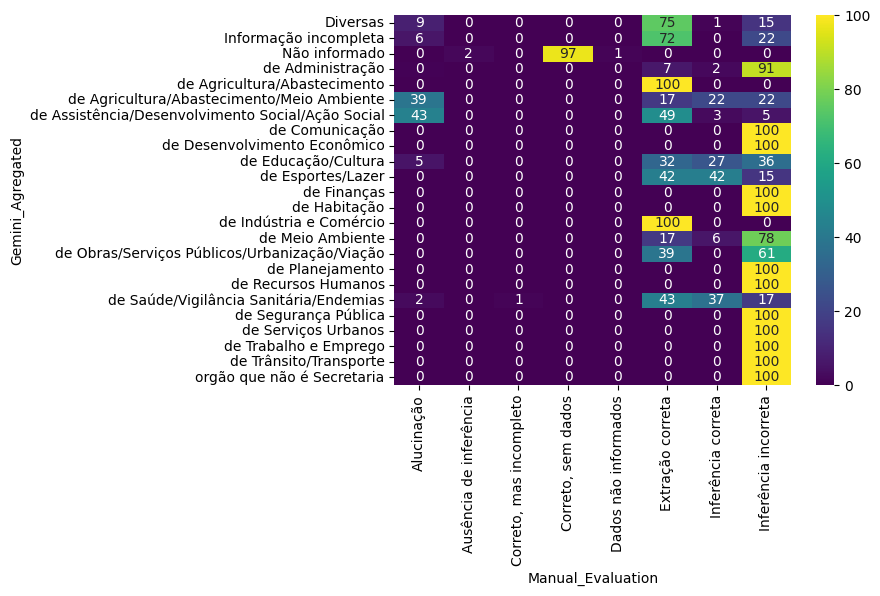

In [75]:
df_perc= df.groupby(['Gemini_Agregated', 'Manual_Evaluation'])['ibge'].agg('count')/df.groupby(['Gemini_Agregated'])['ibge'].agg('count')*100
df_perc = df_perc.unstack()
df_perc = df_perc.fillna(0)
import plotly.express as px
sns.heatmap(df_perc, annot=True, fmt=".0f", cmap="viridis")

<Axes: xlabel='Manual_Evaluation', ylabel='Gemini_Agregated'>

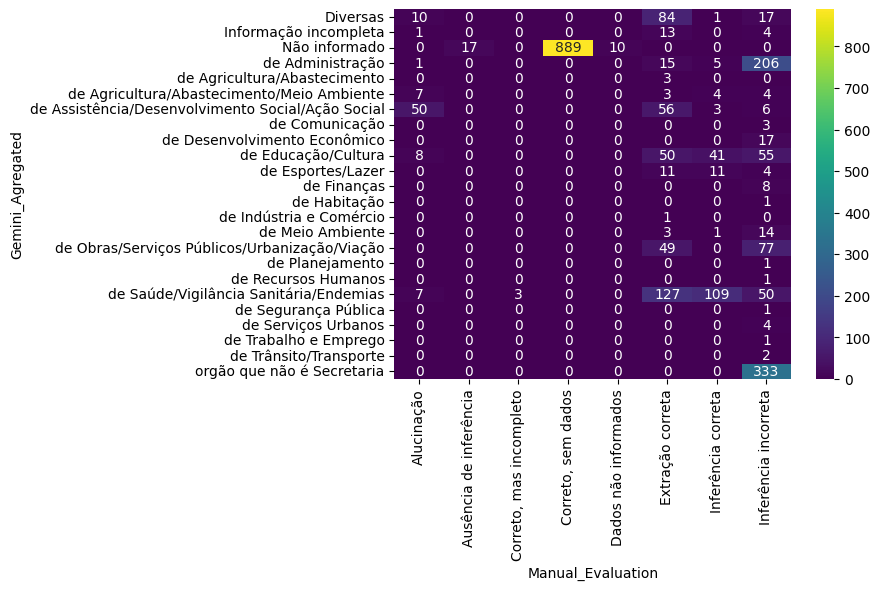

In [76]:
df_perc= df.groupby(['Gemini_Agregated', 'Manual_Evaluation'])['ibge'].agg('count')
df_perc = df_perc.unstack()
df_perc = df_perc.fillna(0)
import plotly.express as px
sns.heatmap(df_perc, annot=True, fmt=".0f", cmap="viridis")

In [59]:
df_perc= df.groupby(['Manual_Evaluation'])['ibge'].agg('count')/df['ibge'].agg('count')*100
df_perc = df_perc.fillna(0)
df_perc
#import plotly.express as px
#sns.heatmap(df_perc, annot=True, fmt=".0f")

Manual_Evaluation
Alucinação                  3.497086
Ausência de inferência      0.707744
Correto, mas incompleto     0.124896
Correto, sem dados         37.010824
Dados não informados        0.416320
Extração correta           17.277269
Inferência correta          7.285595
Inferência incorreta       33.680266
Name: ibge, dtype: float64

## Análise das licitações classificadas pelo modelo como Secretarias de Saúde, com Objetos relacionados a transportes

### BOW

In [60]:
import pandas as pd
import sqlite3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import nltk

In [61]:
# Obter dados
con = sqlite3.connect('scraped.db')
sql_command = "Select ibge, procurement_id, goal, extra4, extra6, extra7 from PROCUREMENTS"
df = pd.read_sql(sql_command, con)
df = df.set_index(df['ibge'] .astype(str) + ' | ' + df['procurement_id'])
df.head()

,ibge,procurement_id,goal,extra4,extra6,extra7
4119905 | 27/2023/6,4119905,27/2023/6,Serviços de Internet com link dedicado para o ...,Câmara Municipal de Ponta Grossa,Inferência incorreta,orgão que não é Secretaria
4119905 | 26/2023/6,4119905,26/2023/6,... fornecimento de “PUXADORES PARA JANELAS TI...,Não informado,"Correto, sem dados",Não informado
4119905 | 25/2023/6,4119905,25/2023/6,... contratação de empresa habilitada para for...,Não informado,"Correto, sem dados",Não informado
4119905 | 24/2023/6,4119905,24/2023/6,Contratação de empresa especializada para Pres...,Não informado,"Correto, sem dados",Não informado
4119905 | 23/2023/6,4119905,23/2023/6,... a “aquisição de 08(oito) refrigeradores ti...,Não informado,"Correto, sem dados",Não informado


In [62]:
# Load  
nltk.download('stopwords')
pt_stop_words = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
tfidf_vectorizer = TfidfVectorizer(stop_words=pt_stop_words)

list_goal = list(df['goal'])
list_goal_min = []
for goal in list_goal:
    list_goal_min.append(' '.join(re.findall(r'[a-zéóáêâãõç]+', goal.lower())))

bow_base = tfidf_vectorizer.fit_transform(list_goal_min)

bow = pd.DataFrame(bow_base.toarray(), index=df.index, columns=tfidf_vectorizer.get_feature_names_out())
bow.head()

,abada,abadá,abaixo,abastecedor,abastecer,abastecimento,abehd,aberto,abertura,abnt,...,ência,óculos,óleo,ópera,óptica,ópticas,óptico,órgão,órgãos,õnibus
4119905 | 27/2023/6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4119905 | 26/2023/6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4119905 | 25/2023/6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4119905 | 24/2023/6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4119905 | 23/2023/6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TF-IDF

In [64]:
df_tf_idf = bow.round(decimals=2)
df_tf_idf.stack().reset_index()
df_tf_idf = df_tf_idf.stack().reset_index()
df_tf_idf = df_tf_idf.set_index(df_tf_idf['level_0'])
df_tf_idf = df_tf_idf.rename(columns={0:'tf_idf', 'level_0': 'Licitação','level_1': 'Palavra'})
df_tf_idf.head()

,Licitação,Palavra,tf_idf
level_0,,,
4119905 | 27/2023/6,4119905 | 27/2023/6,abada,0.0
4119905 | 27/2023/6,4119905 | 27/2023/6,abadá,0.0
4119905 | 27/2023/6,4119905 | 27/2023/6,abaixo,0.0
4119905 | 27/2023/6,4119905 | 27/2023/6,abastecedor,0.0
4119905 | 27/2023/6,4119905 | 27/2023/6,abastecer,0.0


In [65]:
df_full = pd.merge(df, df_tf_idf, left_index=True, right_index=True)

Com o dataset formado, podemos testar uma hipótese levantada pelos voluntários:

O modelo afirmava frequentemente que assuntos ambíguos como transportes na área da saúde era da Secretaria da saúde, quando isso não era dito explicitamente, os voluntários entendiam que não havia informações suficientes no texto para classificar os dados e havia divergência entre o classificado pelo modelo "Secretaria da Saúde" com o esperado pelos voluntários "Não informado" o que era Classificado como "Erro de Extração".

Se este for o caso, ao tirar a média do tf_idf para palavras como "onibus" "transporte" e "passageiros" por classificação (EXtra6), quando o modelo classificou como Secretaria de Saúde/Vigilância Sanitária/Endemias', veremos uma diferença significativa entre os números.

### Resultados da Análise

In [66]:

df_filtrado = df_full[((df_full['Palavra'] =='transporte') | (df_full['Palavra'] =='onibus') | (df_full['Palavra'] =='passageiros') )& (df_full['extra7']=='de Saúde/Vigilância Sanitária/Endemias') ]#.groupby(['extra6'], as_index=False)
df_filtrado.filter(items=['extra6', 'tf_idf']).groupby('extra6').mean()
#df_agrupado

,tf_idf
extra6,
Alucinação,0.000000
"Correto, mas incompleto",0.000000
Extração correta,0.011444
Inferência correta,0.001498
Inferência incorreta,0.015133


**TL;DR**: O modelo frequentemente afirma que uma procuração é da secretaria da saúde, quando os voluntários entendem que não existem informações suficientes para fazer essa afirmação.

**Sobre**

O foco desta análise é a linha tênue entre "Decuções corretas" e "Erro de Extração".

Se o voluntário está afirmando que o a extração do dado é uma "Dedução correta", o modelo foi _capaz de inferir corretamete_ (antropomorfização) qual é a secretaria, mesmo ela não sendo explicitamente informada no Objeto.

Se o voluntário classificar a extração do modelo como "Erro de Extração", o modelo _tirou conclusões precipitadas_ (antropomorfização) dos dados, segundo o voluntário que analisou a situação, as informações estavam presentes no texto para chegar a essa classificação, mas não de pode ter certeza absuluta de essa secretaria é realmente a que solicitou a licitação.

Os voluntários reportaram que este erro era mais comum para Objetos classificados como _Secretaria {Municipal} da Saúde e/ou Vigilância Sanitária e/ou Endemias_, quando os assuntos relacionados a transpostes eram envolvidos. Isso pois segundo os voluntários, estas licitações poderia ser solicitadas por uma Secretaria de Transpotes ou pela Secrataria de Saúde.

Com isso foram selecionadas 3 palavras para analisar estes dados "**transporte**", "**onibus**" e "**passageiros**".
Apartindo do presuposto de que a análise dos voluntários estão corretas, podemos calcular o quanto estas palavras são importantes no contexto da licitação com relação as demais licitações analisando a frequência em que ocorrem. Os valores listados acima são resultado desta análise.

**Conclusão**: Podemos concluir que sim, existe uma presença mais forte das palavras relacionadas a transporte selecionadas, nas licitações em que os voluntários indicaram que o modelo _tirou conclusões precipitadas sobre o campo "Objeto"_ (antropomorfização). Isso pode ser causado por conta de víes no modelo, ou  por conta dos víes dos voluntários.

In [67]:
import pandas as pd
import sqlite3
import seaborn as sns
con = sqlite3.connect('scraped.db')
sql_command = "Select extra6, case when goal like '%transporte%' or goal like '%onibus%' or goal like '%passageiros%' then 'tem palavas' else 'não tem palaras' end tipo, count(extra7) contagem from PROCUREMENTS where extra7 = 'de Saúde/Vigilância Sanitária/Endemias' group by extra6, goal like '%transporte%' or goal like '%onibus%' or goal like '%passageiros%'"
df = pd.read_sql(sql_command, con)
df

,extra6,tipo,contagem
0,Alucinação,não tem palaras,7
1,"Correto, mas incompleto",não tem palaras,3
2,Extração correta,não tem palaras,114
3,Extração correta,tem palavas,13
4,Inferência correta,não tem palaras,106
5,Inferência correta,tem palavas,3
6,Inferência incorreta,não tem palaras,40
7,Inferência incorreta,tem palavas,10


In [68]:
df.pivot(index='extra6', columns='tipo', values='contagem')

tipo,não tem palaras,tem palavas
extra6,,
Alucinação,7.0,NaN
"Correto, mas incompleto",3.0,NaN
Extração correta,114.0,13.0
Inferência correta,106.0,3.0
Inferência incorreta,40.0,10.0
